# Preprocessing, analysis and Linear Regression of INEGI dataset focusing on Morelos and the variable PSINDER (People With no Health Insurance) with the KDD model

# ![KDD process](KDD_process.png)

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("conjunto_de_datos_iter_17CSV20.csv")

In [3]:
df.head()

ENTIDAD  NOM_ENT  MUN                      NOM_MUN   LOC  \
0       17  Morelos    0  Total de la entidad Morelos     0   
1       17  Morelos    0  Total de la entidad Morelos  9998   
2       17  Morelos    0  Total de la entidad Morelos  9999   
3       17  Morelos    1                     Amacuzac     0   
4       17  Morelos    1                     Amacuzac     1   

                        NOM_LOC          LONGITUD          LATITUD  ALTITUD  \
0           Total de la Entidad               NaN              NaN      NaN   
1   Localidades de una vivienda               NaN              NaN      NaN   
2  Localidades de dos viviendas               NaN              NaN      NaN   
3           Total del Municipio               NaN              NaN      NaN   
4                      Amacuzac   99°22'10.251" W  18°36'00.006" N    900.0   

    POBTOT  ... VPH_CEL VPH_INTER VPH_STVP VPH_SPMVPI VPH_CVJ VPH_SINRTV  \
0  1971520  ...  499787    307830   222853      90825   48209      24696   
1     1382  ...     145        40       35          2       3         39   
2      603  ...     150        30       30          5       0         35   
3    17598  ...    4056      1919     1833        277     130        454   
4     5575  ...    1442       811      835        164      80         90   

  VPH_SINLTC VPH_SINCINT VPH_SINTIC TAMLOC  
0      34950      227132       7724      *  
1         27         130         18      *  
2         27         144         16      *  
3        570        2895        175      *  
4         83         741         22      6  

[5 rows x 286 columns]

### Check the nulls and NaNs in the dataset and other missing values

In [4]:
df.isnull().sum()

ENTIDAD        0
NOM_ENT        0
MUN            0
NOM_MUN        0
LOC            0
              ..
VPH_SINRTV     0
VPH_SINLTC     0
VPH_SINCINT    0
VPH_SINTIC     0
TAMLOC         0
Length: 286, dtype: int64

In [5]:
df.isna().sum()

ENTIDAD        0
NOM_ENT        0
MUN            0
NOM_MUN        0
LOC            0
              ..
VPH_SINRTV     0
VPH_SINLTC     0
VPH_SINCINT    0
VPH_SINTIC     0
TAMLOC         0
Length: 286, dtype: int64

## Start the preprocessing

#### After reviewing the dataset with excel to see a better insight, there are a lot of values as * values that need to be cleaned since they do not apport any important information

In [6]:
df = df[df != "*"]
df.dropna().reset_index(drop = True)

ENTIDAD  NOM_ENT  MUN   NOM_MUN  LOC        NOM_LOC          LONGITUD  \
0          17  Morelos    1  Amacuzac    1       Amacuzac   99°22'10.251" W   
1          17  Morelos    1  Amacuzac    2        Cajones   99°20'48.128" W   
2          17  Morelos    1  Amacuzac    3    Casahuatlán   99°23'09.536" W   
3          17  Morelos    1  Amacuzac    4     Coahuixtla   99°22'08.736" W   
4          17  Morelos    1  Amacuzac    5     Huajintlán   99°25'27.001" W   
...       ...      ...  ...       ...  ...            ...               ...   
1303       17  Morelos   36  Hueyapan    7  El Chupamirto   98°42'54.266" W   
1304       17  Morelos   36  Hueyapan    9      Las Mesas   98°43'21.200" W   
1305       17  Morelos   36  Hueyapan   10     Matlacotla   98°41'50.894" W   
1306       17  Morelos   36  Hueyapan   13         Olivar   98°41'15.080" W   
1307       17  Morelos   36  Hueyapan   14    Tlalcomulco   98°42'24.346" W   

              LATITUD  ALTITUD  POBTOT  ... VPH_CEL VPH_INTER VPH_STVP  \
0     18°36'00.006" N    900.0    5575  ...    1442       811      835   
1     18°34'33.424" N    894.0     553  ...     122        39       27   
2     18°34'24.213" N    949.0    1915  ...     400       123       72   
3     18°34'26.698" N    914.0    1151  ...     238        99       61   
4     18°36'35.101" N    926.0    1788  ...     411       177      219   
...               ...      ...     ...  ...     ...       ...      ...   
1303  18°51'51.801" N   2043.0      20  ...       4         0        0   
1304  18°49'51.235" N   1963.0      30  ...      11         1        1   
1305  18°52'11.129" N   2248.0      45  ...       9         1        2   
1306  18°51'38.150" N   2103.0      78  ...      15         2        7   
1307  18°51'38.771" N   2178.0      82  ...      20         7        1   

     VPH_SPMVPI VPH_CVJ VPH_SINRTV VPH_SINLTC VPH_SINCINT VPH_SINTIC TAMLOC  
0           164      80         90         83         741         22      6  
1             3       3         21         19         104          8      3  
2             5       4         67         66         365         19      4  
3             3       3         29         39         200         11      4  
4            20      10         40         56         321         20      4  
...         ...     ...        ...        ...         ...        ...    ...  
1303          0       0          0          0           4          0      1  
1304          1       0          4          2          11          2      1  
1305          0       1          1          2          10          0      1  
1306          0       0          3          4          17          0      1  
1307          0       0          2          0          13          0      1  

[1308 rows x 286 columns]

### Check the dtypes so I can check if I need to change the datatypes in order to preprocess them correctly

In [7]:
df.dtypes

ENTIDAD         int64
NOM_ENT        object
MUN             int64
NOM_MUN        object
LOC             int64
                ...  
VPH_SINRTV     object
VPH_SINLTC     object
VPH_SINCINT    object
VPH_SINTIC     object
TAMLOC         object
Length: 286, dtype: object

In [8]:
text_columns = df.select_dtypes(include=['object']).columns
for column in text_columns:
    df[column] = df[column].astype('category').cat.codes 

In [9]:
df.dtypes

ENTIDAD        int64
NOM_ENT         int8
MUN            int64
NOM_MUN         int8
LOC            int64
               ...  
VPH_SINRTV     int16
VPH_SINLTC     int16
VPH_SINCINT    int16
VPH_SINTIC      int8
TAMLOC          int8
Length: 286, dtype: object

In [10]:
df.isnull().sum()


ENTIDAD        0
NOM_ENT        0
MUN            0
NOM_MUN        0
LOC            0
              ..
VPH_SINRTV     0
VPH_SINLTC     0
VPH_SINCINT    0
VPH_SINTIC     0
TAMLOC         0
Length: 286, dtype: int64

### Now I start checking the correlation between variables and look for other things to clean

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
corr = df.corr()
corr 

ENTIDAD  NOM_ENT       MUN   NOM_MUN       LOC   NOM_LOC  \
ENTIDAD          NaN      NaN       NaN       NaN       NaN       NaN   
NOM_ENT          NaN      NaN       NaN       NaN       NaN       NaN   
MUN              NaN      NaN  1.000000  0.900511  0.004546  0.012584   
NOM_MUN          NaN      NaN  0.900511  1.000000  0.005133  0.020272   
LOC              NaN      NaN  0.004546  0.005133  1.000000  0.092184   
...              ...      ...       ...       ...       ...       ...   
VPH_SINRTV       NaN      NaN -0.002642  0.001162 -0.054481  0.014050   
VPH_SINLTC       NaN      NaN -0.037229 -0.030862 -0.092712  0.000971   
VPH_SINCINT      NaN      NaN -0.001087 -0.006699 -0.016204 -0.073410   
VPH_SINTIC       NaN      NaN  0.043220  0.042526 -0.073573  0.081248   
TAMLOC           NaN      NaN -0.027580 -0.015638 -0.191093  0.047582   

             LONGITUD   LATITUD   ALTITUD    POBTOT  ...   VPH_CEL  VPH_INTER  \
ENTIDAD           NaN       NaN       NaN       NaN  ...       NaN        NaN   
NOM_ENT           NaN       NaN       NaN       NaN  ...       NaN        NaN   
MUN          0.004884  0.103156 -0.023070 -0.050757  ...  0.007960  -0.018086   
NOM_MUN      0.020857  0.127211 -0.038977  0.012905  ...  0.009714   0.003586   
LOC         -0.303340 -0.302835 -0.075352 -0.015369  ...  0.001753  -0.114222   
...               ...       ...       ...       ...  ...       ...        ...   
VPH_SINRTV   0.100585 -0.042254 -0.091441  0.041978  ...  0.248732   0.330781   
VPH_SINLTC   0.112617  0.023090  0.010131  0.051409  ...  0.251680   0.288587   
VPH_SINCINT  0.074519  0.039013  0.007139  0.003208  ...  0.493946   0.243136   
VPH_SINTIC   0.055014 -0.076815 -0.104285  0.140795  ...  0.154905   0.245024   
TAMLOC       0.127588  0.118353 -0.042658 -0.010798  ...  0.147228   0.324583   

             VPH_STVP  VPH_SPMVPI   VPH_CVJ  VPH_SINRTV  VPH_SINLTC  \
ENTIDAD           NaN         NaN       NaN         NaN         NaN   
NOM_ENT           NaN         NaN       NaN         NaN         NaN   
MUN         -0.019390   -0.059656 -0.078292   -0.002642   -0.037229   
NOM_MUN      0.011667   -0.019686 -0.049636    0.001162   -0.030862   
LOC         -0.120619   -0.119694 -0.120391   -0.054481   -0.092712   
...               ...         ...       ...         ...         ...   
VPH_SINRTV   0.325945    0.327161  0.369854    1.000000    0.538664   
VPH_SINLTC   0.328058    0.340876  0.362331    0.538664    1.000000   
VPH_SINCINT  0.239317    0.199217  0.189747    0.366020    0.264221   
VPH_SINTIC   0.280389    0.304770  0.349319    0.396467    0.366374   
TAMLOC       0.353873    0.495059  0.517394    0.463209    0.432825   

             VPH_SINCINT  VPH_SINTIC    TAMLOC  
ENTIDAD              NaN         NaN       NaN  
NOM_ENT              NaN         NaN       NaN  
MUN            -0.001087    0.043220 -0.027580  
NOM_MUN        -0.006699    0.042526 -0.015638  
LOC            -0.016204   -0.073573 -0.191093  
...                  ...         ...       ...  
VPH_SINRTV      0.366020    0.396467  0.463209  
VPH_SINLTC      0.264221    0.366374  0.432825  
VPH_SINCINT     1.000000    0.157528  0.226240  
VPH_SINTIC      0.157528    1.000000  0.555970  
TAMLOC          0.226240    0.555970  1.000000  

[286 rows x 286 columns]

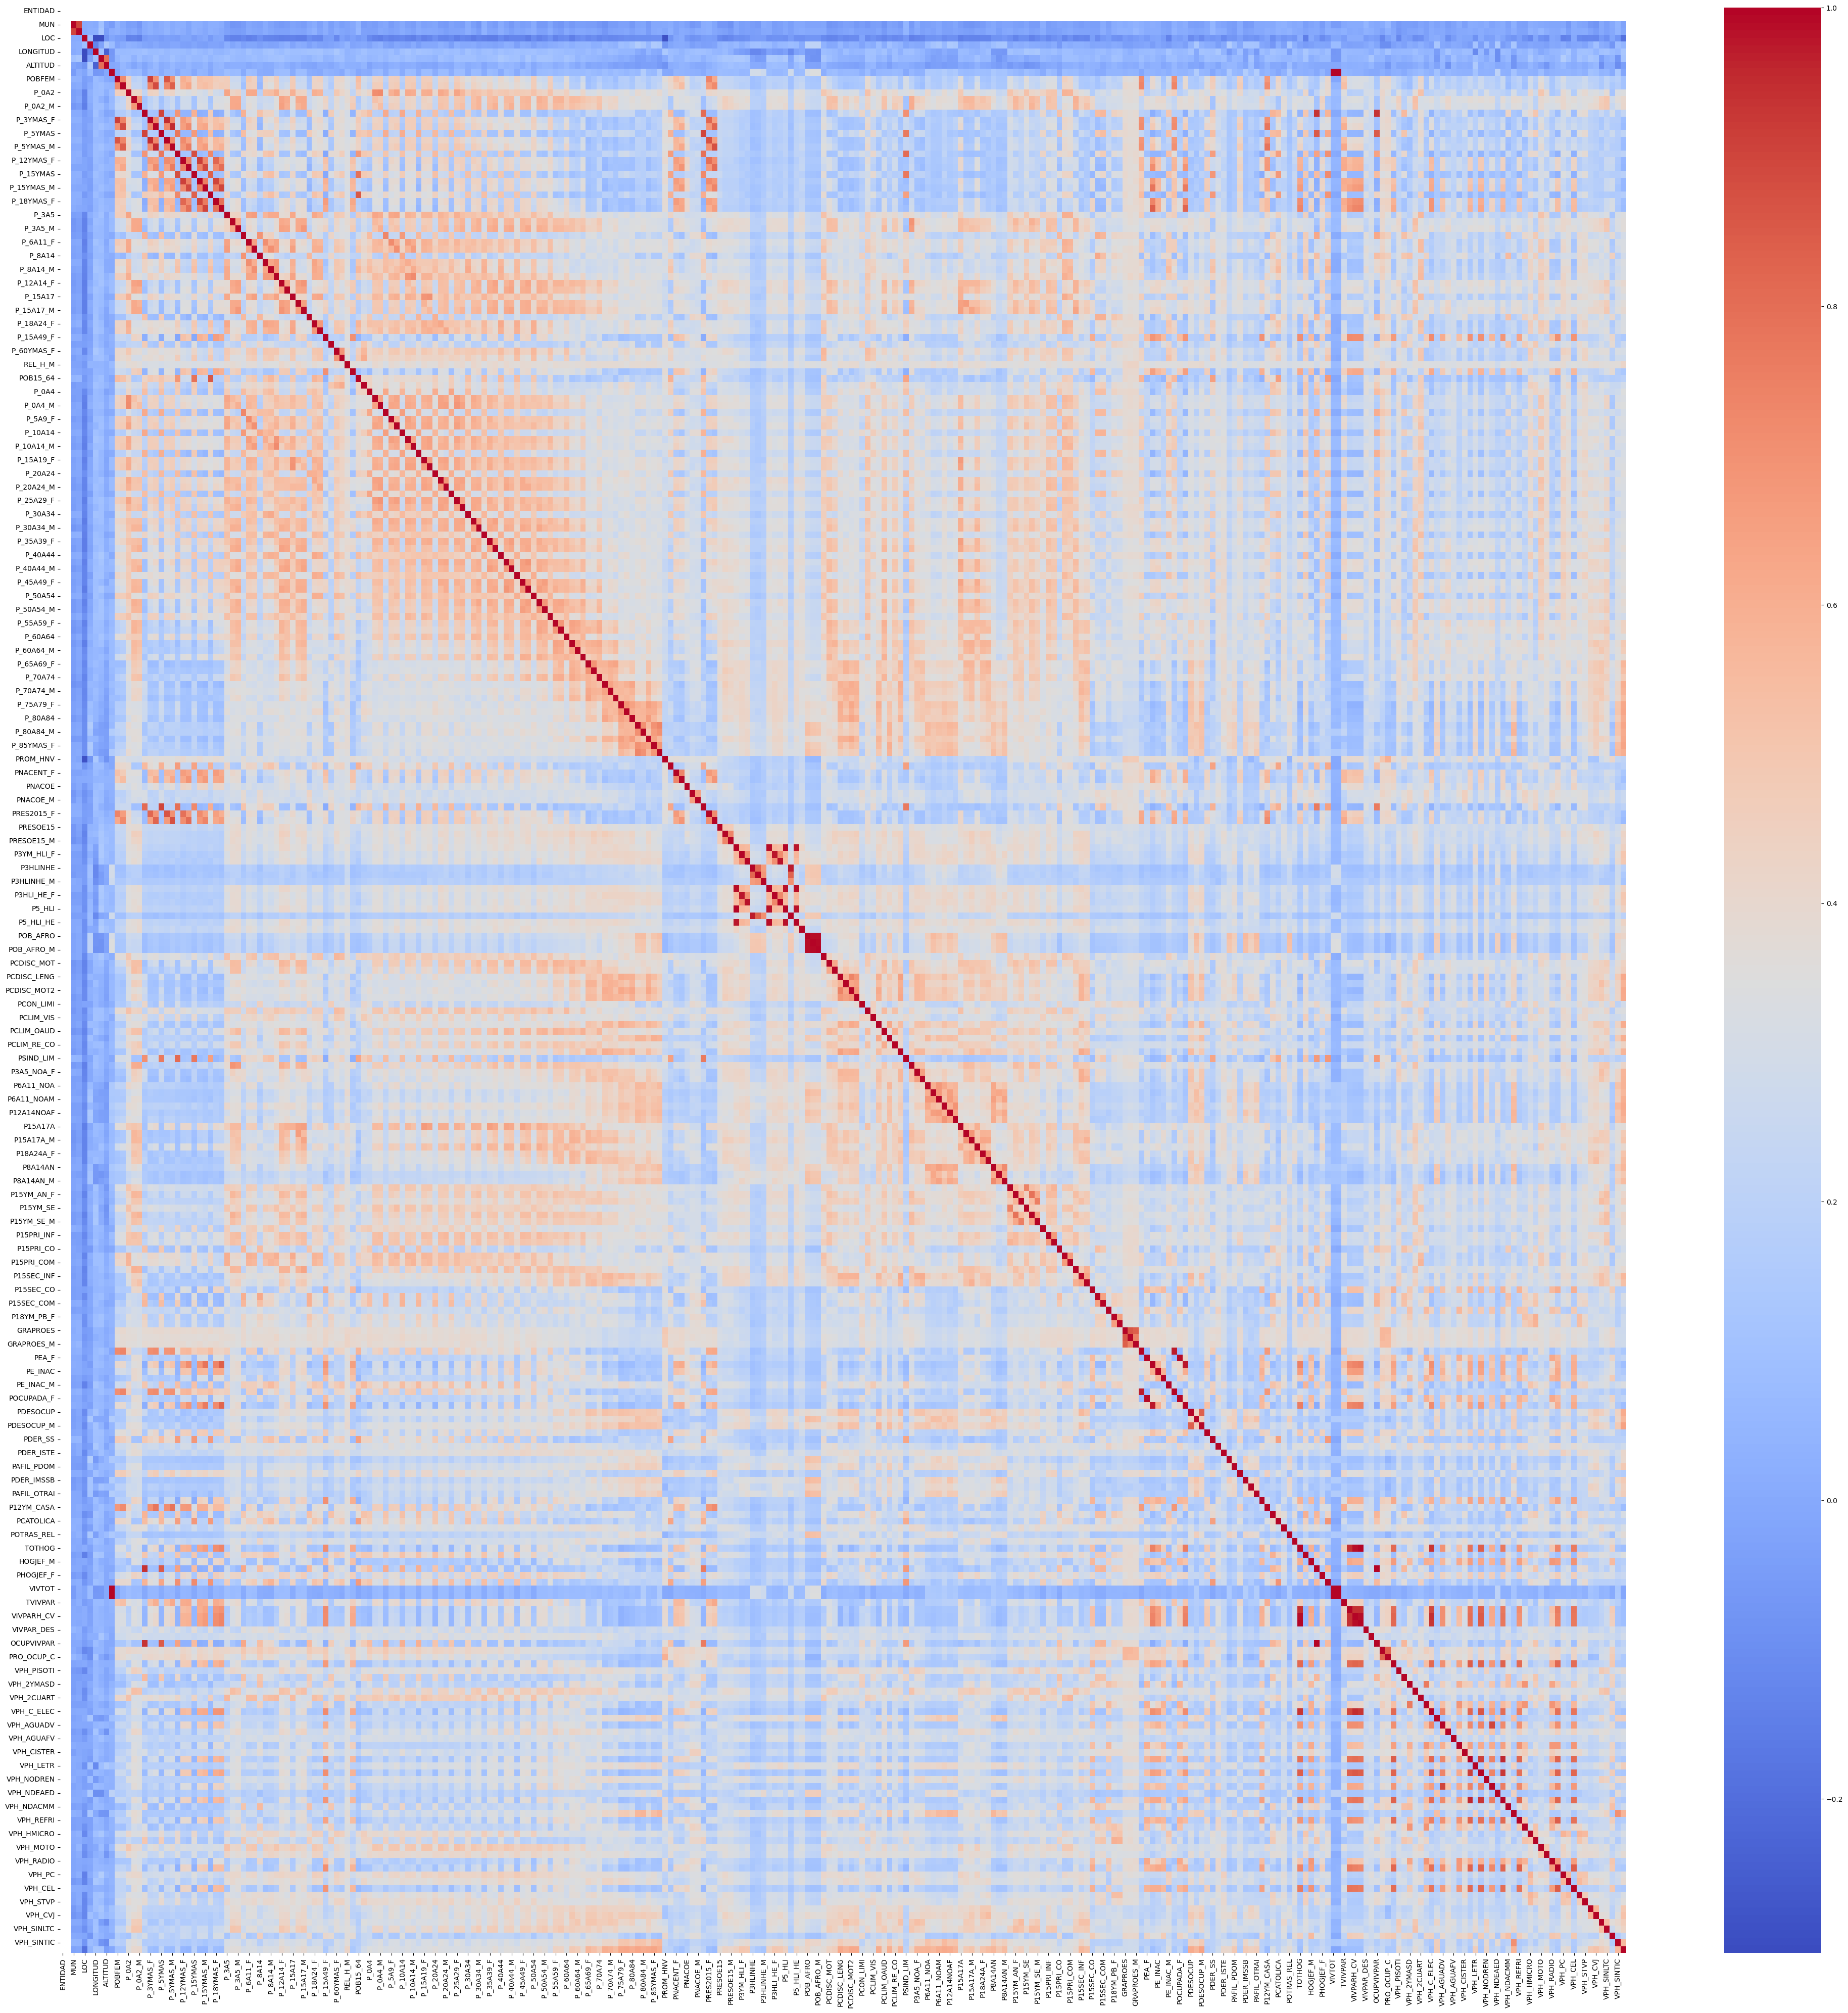

In [13]:
plt.figure(figsize=(50,50))

sns.heatmap(corr, annot=False, cmap='coolwarm')

plt.show()

#### I realized I don't need the first 9 columns since they have strings and are not relevant to the analysis, so we create a new df that doesn't include those

In [14]:
df_sub = df.iloc[:,10:]
df_sub

POBFEM  POBMAS  P_0A2  P_0A2_F  P_0A2_M  P_3YMAS  P_3YMAS_F  P_3YMAS_M  \
0          8     509    209      108      110      200        517        494   
1         18     247     63      167       15       98         20        231   
2        212     274    101       44        2      517        189        261   
3        504     475    205      111      101      157        482        462   
4        239     213     65       17      177      492        229        200   
...      ...     ...    ...      ...      ...      ...        ...        ...   
1673      -1      -1     -1       -1       -1       -1         -1         -1   
1674      -1      -1     -1       -1       -1       -1         -1         -1   
1675      -1      -1     -1       -1       -1       -1         -1         -1   
1676     359     395      1        1        0        1        307        391   
1677     472     494      0        0        0      159        462        491   

      P_5YMAS  P_5YMAS_F  ...  VPH_CEL  VPH_INTER  VPH_STVP  VPH_SPMVPI  \
0         184        508  ...      301        158       104         165   
1          82         20  ...       64        194       153          52   
2         490        185  ...       70        155       142         121   
3         139        475  ...      256         93        78          80   
4         468        220  ...       63        275       251          42   
...       ...        ...  ...      ...        ...       ...         ...   
1673       -1         -1  ...       -1         -1        -1          -1   
1674       -1         -1  ...       -1         -1        -1          -1   
1675       -1         -1  ...       -1         -1        -1          -1   
1676      615        303  ...      118          0         1           0   
1677      114        433  ...      195          0         0           0   

      VPH_CVJ  VPH_SINRTV  VPH_SINLTC  VPH_SINCINT  VPH_SINTIC  TAMLOC  
0          96          62          97          148          91      -1  
1          67          91          80           43          22      -1  
2           0          87          80           61          17      -1  
3          19         100         139          190          20      -1  
4         128         145         165          320          29       8  
...       ...         ...         ...          ...         ...     ...  
1673       -1          -1          -1           -1          -1       0  
1674       -1          -1          -1           -1          -1       0  
1675       -1          -1          -1           -1          -1       0  
1676        0           1           1          195           1      -1  
1677        0           1           0          234           0      -1  

[1678 rows x 276 columns]

In [15]:
# Create correlation also with new df
corr_new = df_sub.corr()
corr_new

POBFEM    POBMAS     P_0A2   P_0A2_F   P_0A2_M   P_3YMAS  \
POBFEM       1.000000  0.724385  0.457394  0.196050  0.216333  0.155702   
POBMAS       0.724385  1.000000  0.465553  0.229893  0.234305  0.160057   
P_0A2        0.457394  0.465553  1.000000  0.425545  0.426561  0.225927   
P_0A2_F      0.196050  0.229893  0.425545  1.000000  0.679413  0.111293   
P_0A2_M      0.216333  0.234305  0.426561  0.679413  1.000000  0.121013   
...               ...       ...       ...       ...       ...       ...   
VPH_SINRTV   0.149513  0.140128  0.293318  0.465486  0.474589  0.252563   
VPH_SINLTC   0.219498  0.221791  0.386873  0.502063  0.500384  0.181131   
VPH_SINCINT  0.165127  0.139144  0.115466  0.285780  0.248572  0.309446   
VPH_SINTIC   0.187311  0.173123  0.322995  0.365480  0.331521  0.164173   
TAMLOC       0.110754  0.111163  0.341066  0.402165  0.408992  0.233043   

             P_3YMAS_F  P_3YMAS_M   P_5YMAS  P_5YMAS_F  ...   VPH_CEL  \
POBFEM        0.911509   0.700948  0.201232   0.858115  ...  0.218770   
POBMAS        0.743429   0.886864  0.209980   0.730827  ...  0.218969   
P_0A2         0.442460   0.433987  0.257006   0.412665  ...  0.167538   
P_0A2_F       0.204604   0.251730  0.108455   0.209234  ...  0.369798   
P_0A2_M       0.215937   0.260429  0.117547   0.215866  ...  0.346268   
...                ...        ...       ...        ...  ...       ...   
VPH_SINRTV    0.132677   0.136769  0.226441   0.131668  ...  0.248732   
VPH_SINLTC    0.213962   0.231016  0.187171   0.214630  ...  0.251680   
VPH_SINCINT   0.173975   0.164615  0.270583   0.191976  ...  0.493946   
VPH_SINTIC    0.171011   0.159611  0.176139   0.173733  ...  0.154905   
TAMLOC        0.093635   0.076038  0.220868   0.082173  ...  0.147228   

             VPH_INTER  VPH_STVP  VPH_SPMVPI   VPH_CVJ  VPH_SINRTV  \
POBFEM        0.226014  0.271120    0.194152  0.185648    0.149513   
POBMAS        0.241391  0.267632    0.211836  0.194546    0.140128   
P_0A2         0.349133  0.389613    0.327676  0.342244    0.293318   
P_0A2_F       0.337128  0.354569    0.352403  0.384384    0.465486   
P_0A2_M       0.327158  0.349555    0.382333  0.402896    0.474589   
...                ...       ...         ...       ...         ...   
VPH_SINRTV    0.330781  0.325945    0.327161  0.369854    1.000000   
VPH_SINLTC    0.288587  0.328058    0.340876  0.362331    0.538664   
VPH_SINCINT   0.243136  0.239317    0.199217  0.189747    0.366020   
VPH_SINTIC    0.245024  0.280389    0.304770  0.349319    0.396467   
TAMLOC        0.324583  0.353873    0.495059  0.517394    0.463209   

             VPH_SINLTC  VPH_SINCINT  VPH_SINTIC    TAMLOC  
POBFEM         0.219498     0.165127    0.187311  0.110754  
POBMAS         0.221791     0.139144    0.173123  0.111163  
P_0A2          0.386873     0.115466    0.322995  0.341066  
P_0A2_F        0.502063     0.285780    0.365480  0.402165  
P_0A2_M        0.500384     0.248572    0.331521  0.408992  
...                 ...          ...         ...       ...  
VPH_SINRTV     0.538664     0.366020    0.396467  0.463209  
VPH_SINLTC     1.000000     0.264221    0.366374  0.432825  
VPH_SINCINT    0.264221     1.000000    0.157528  0.226240  
VPH_SINTIC     0.366374     0.157528    1.000000  0.555970  
TAMLOC         0.432825     0.226240    0.555970  1.000000  

[276 rows x 276 columns]

### I now need to see the correlation of my main variable with a list to check if there are problems

In [16]:
correlation_variable_target = df_sub.corr()["PSINDER"]
sorted_correlation = correlation_variable_target.sort_values(ascending=False)

sorted_correlation

PSINDER       1.000000
POCUPADA_M    0.530949
PEA_M         0.526136
TOTHOG        0.493004
TVIVPARHAB    0.493004
                ...   
P_75A79_M     0.138142
P_5YMAS       0.137588
POTRAS_REL    0.131646
TVIVHAB       0.044423
VIVTOT        0.043417
Name: PSINDER, Length: 276, dtype: float64

##### Plot a graph bar to check how the correlations are

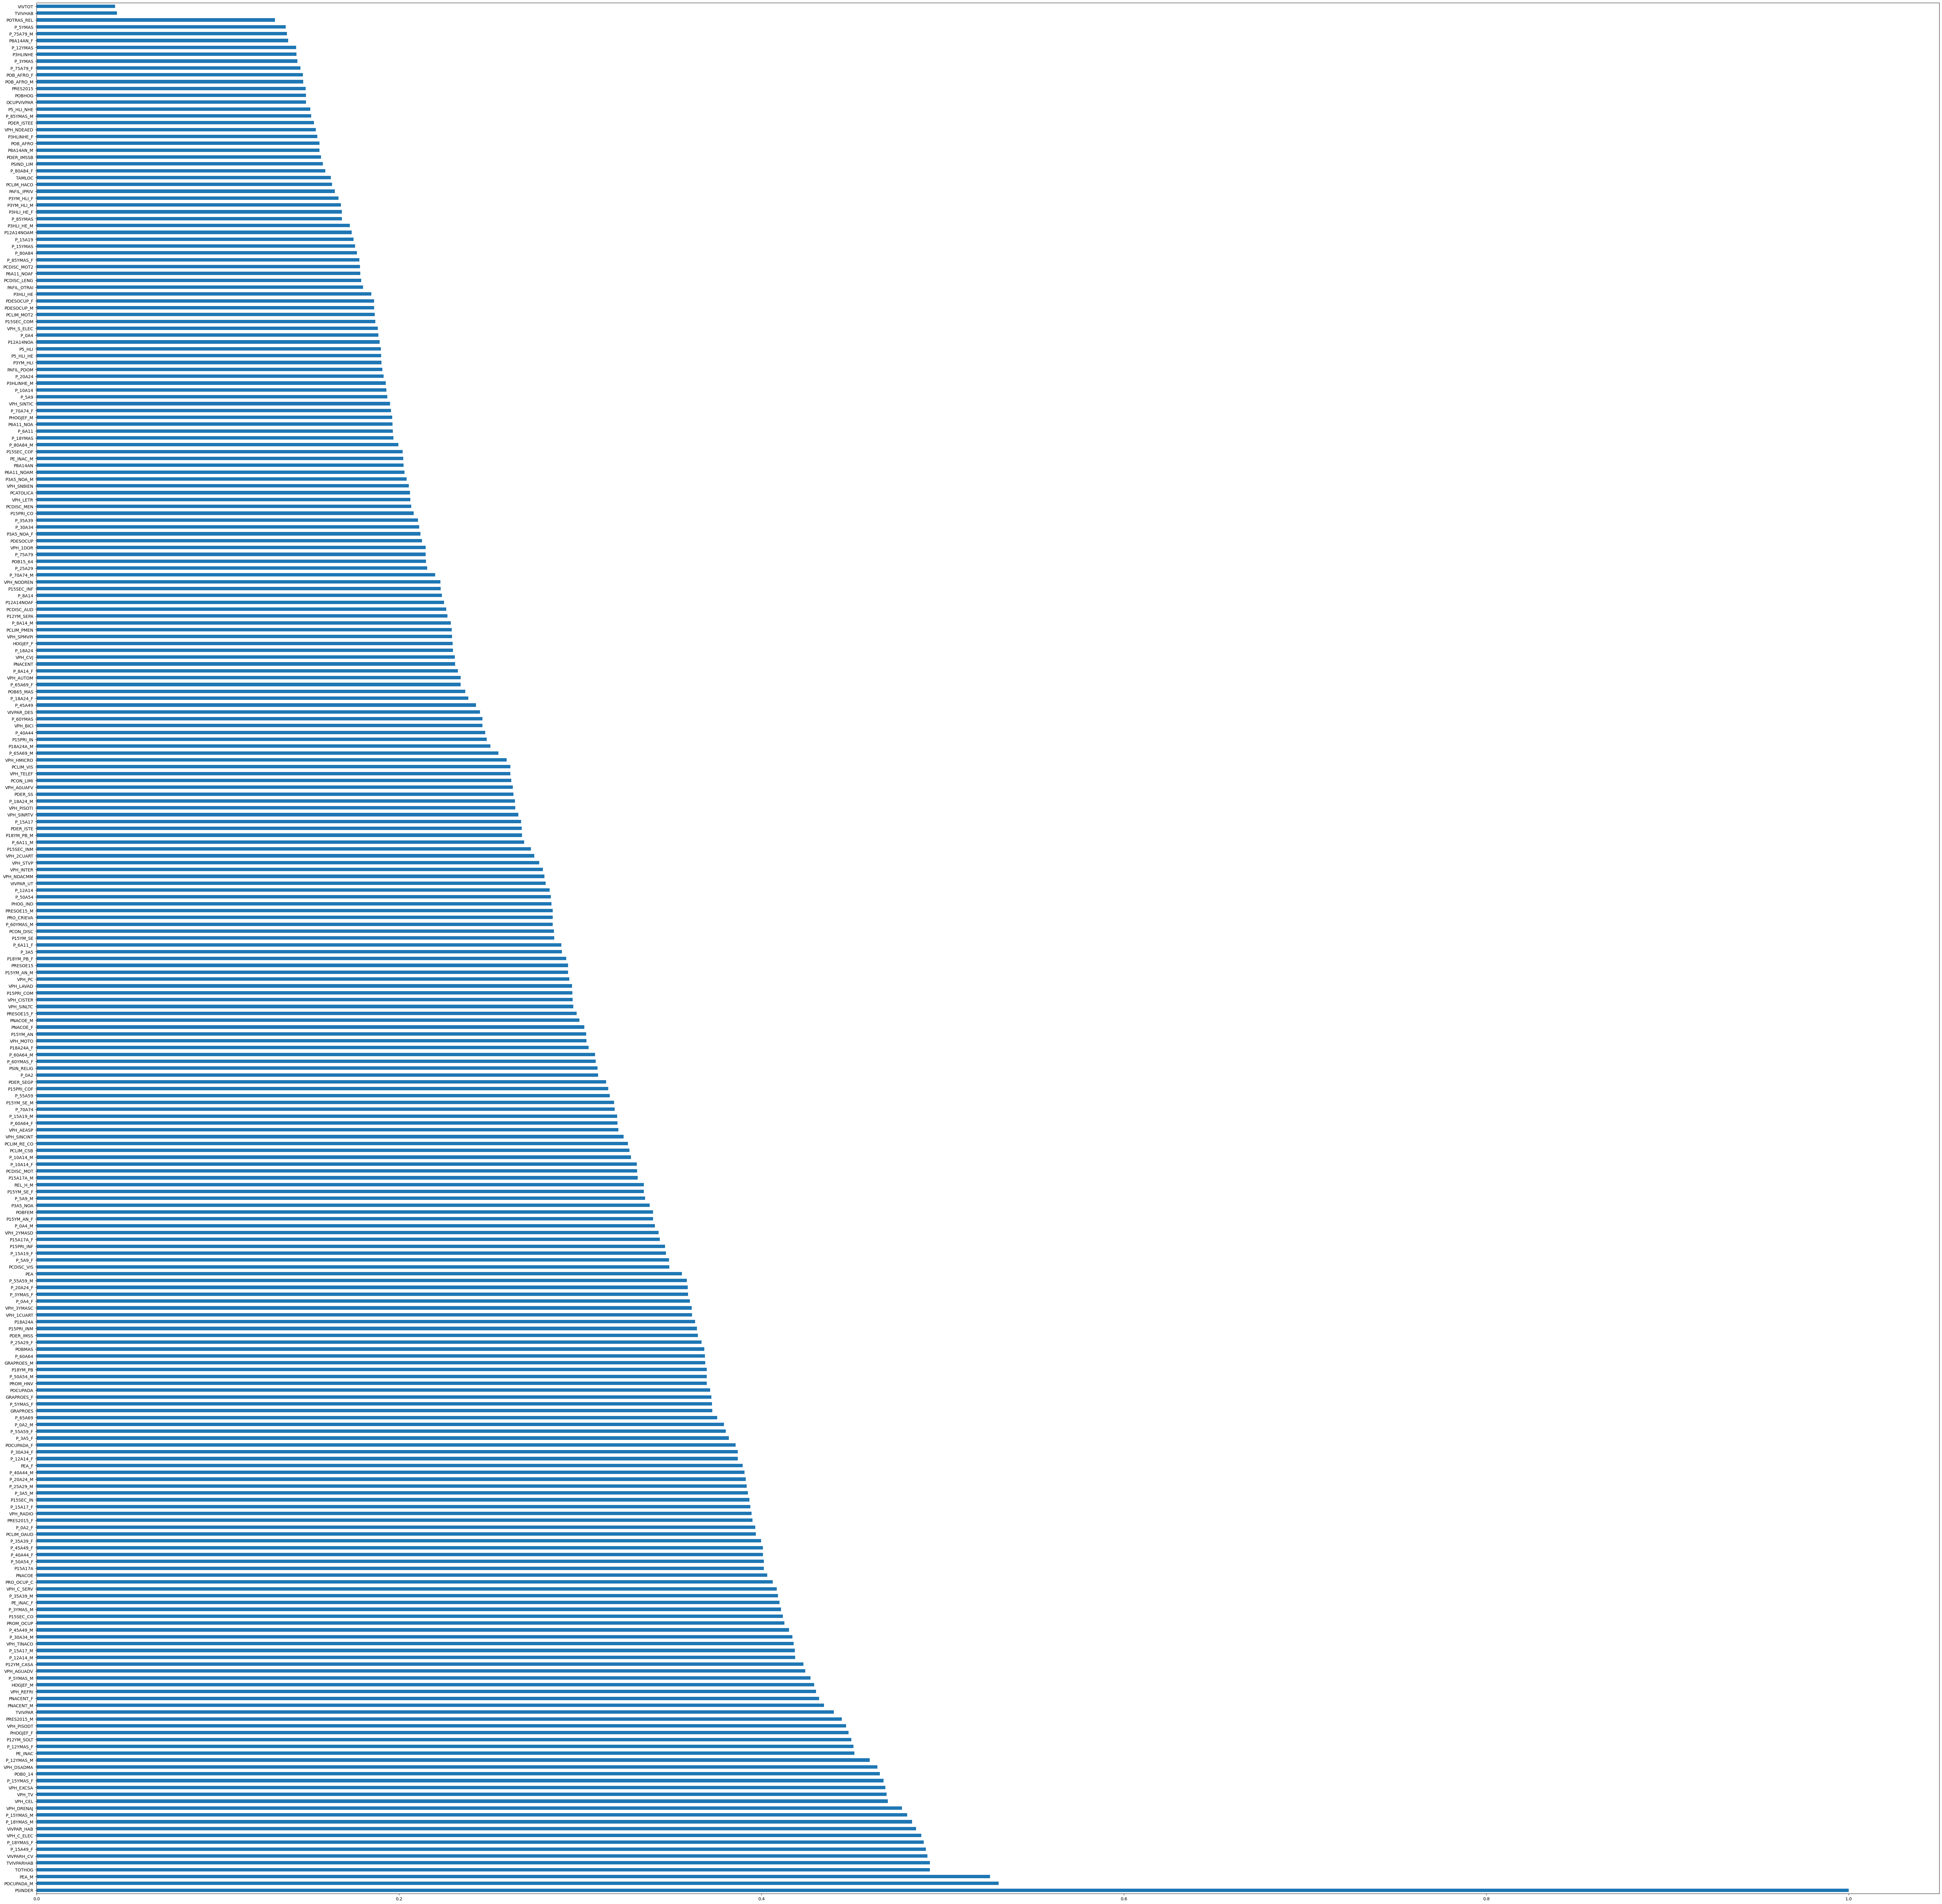

In [17]:
plt.figure(figsize=(80,80))

sorted_correlation.plot(kind='barh')

plt.show()

### I need to use the dimensonality reduction since there are a lot of variables that have a strong correlation, I am going to be using the PCA technique

#### First checking the n components I need

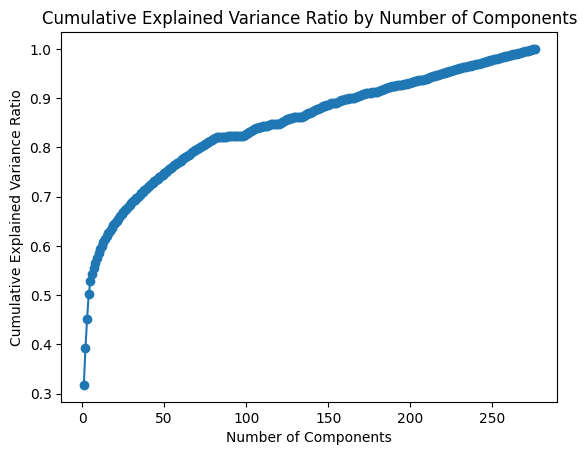

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the data (mean=0, variance=1)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_sub)

# Calculate the covariance matrix
cov_matrix = np.cov(df_scaled, rowvar=False)

# Calculate the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, _ = np.linalg.eig(cov_matrix)

# Calculate the explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Visualize the cumulative explained variance
import matplotlib.pyplot as plt

plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Number of Components')
plt.show()

In [19]:
threshold = 0.55 # Define the threshold of explained variance you want to retain

# Find the index where cumulative explained variance exceeds the threshold
n_components = np.argmax(cumulative_explained_variance > threshold) + 1

print(f"Number of components needed to retain {threshold * 100}% of the variance: {n_components}")


Number of components needed to retain 55.00000000000001% of the variance: 7


#### Now I apply the PCA

Explained Variance Ratio: [0.31774197 0.07558869 0.05914344 0.04909164 0.02643798 0.01402828
 0.01228575]


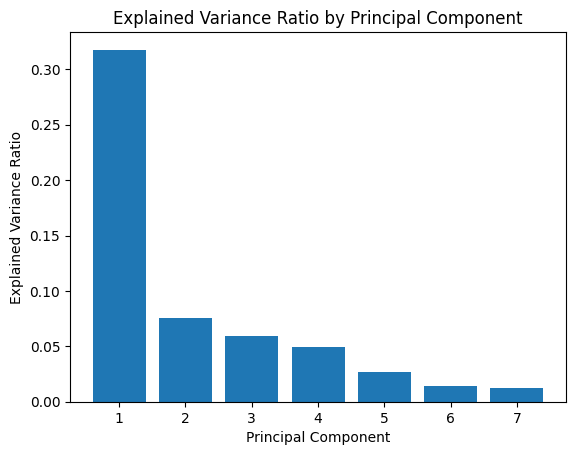

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Create a PCA object with the desired number of components
n_components = 7  
pca = PCA(n_components=n_components)

# Fit the PCA model to your scaled data
principal_components = pca.fit_transform(df_scaled)

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])

# Optional: If you want to see the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Optional: Visualize the explained variance ratio
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

In [22]:
df_sub.head()

POBFEM  POBMAS  P_0A2  P_0A2_F  P_0A2_M  P_3YMAS  P_3YMAS_F  P_3YMAS_M  \
0       8     509    209      108      110      200        517        494   
1      18     247     63      167       15       98         20        231   
2     212     274    101       44        2      517        189        261   
3     504     475    205      111      101      157        482        462   
4     239     213     65       17      177      492        229        200   

   P_5YMAS  P_5YMAS_F  ...  VPH_CEL  VPH_INTER  VPH_STVP  VPH_SPMVPI  VPH_CVJ  \
0      184        508  ...      301        158       104         165       96   
1       82         20  ...       64        194       153          52       67   
2      490        185  ...       70        155       142         121        0   
3      139        475  ...      256         93        78          80       19   
4      468        220  ...       63        275       251          42      128   

   VPH_SINRTV  VPH_SINLTC  VPH_SINCINT  VPH_SINTIC  TAMLOC  
0          62          97          148          91      -1  
1          91          80           43          22      -1  
2          87          80           61          17      -1  
3         100         139          190          20      -1  
4         145         165          320          29       8  

[5 rows x 276 columns]

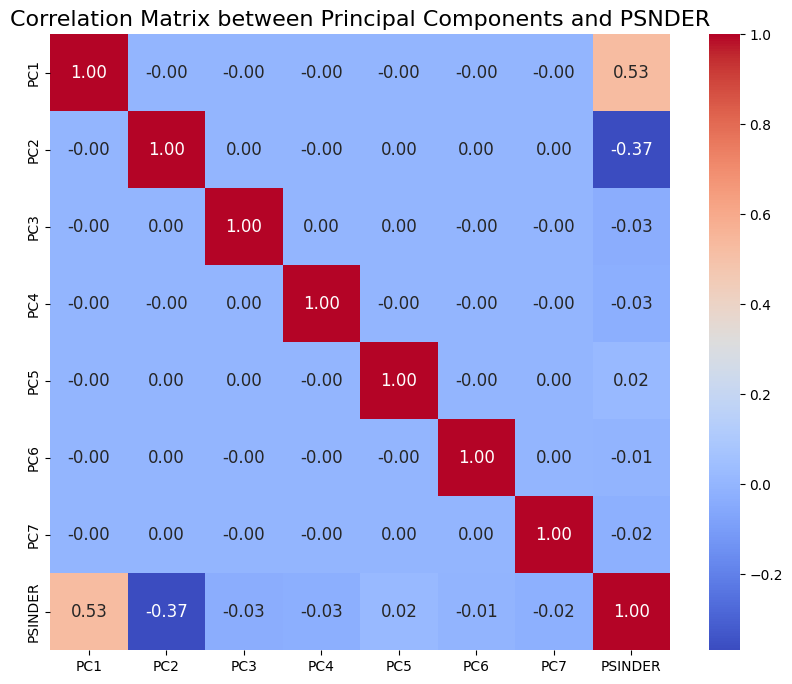

In [24]:

# Assuming 'df_sub' is your original DataFrame containing the principal components and 'PSNDER' variable
df_merged = pd.concat([principal_df, df_sub['PSINDER']], axis=1)

# Calculate the correlation matrix
correlation_matrix = df_merged.corr()

# Plot the correlation matrix
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 12})
plt.title('Correlation Matrix between Principal Components and PSNDER', fontsize=16)
plt.show()


# Since I realized this PCA did not worked as I expected, I am going to try other iteration

#### From the bar graph I got before I am going to extract the variables with the most value

#### I am taking into consideration every variable since I expect not too much problem, although if it causes problems, I will not take into accoun the first 110 columns which are the ones with the ages of people

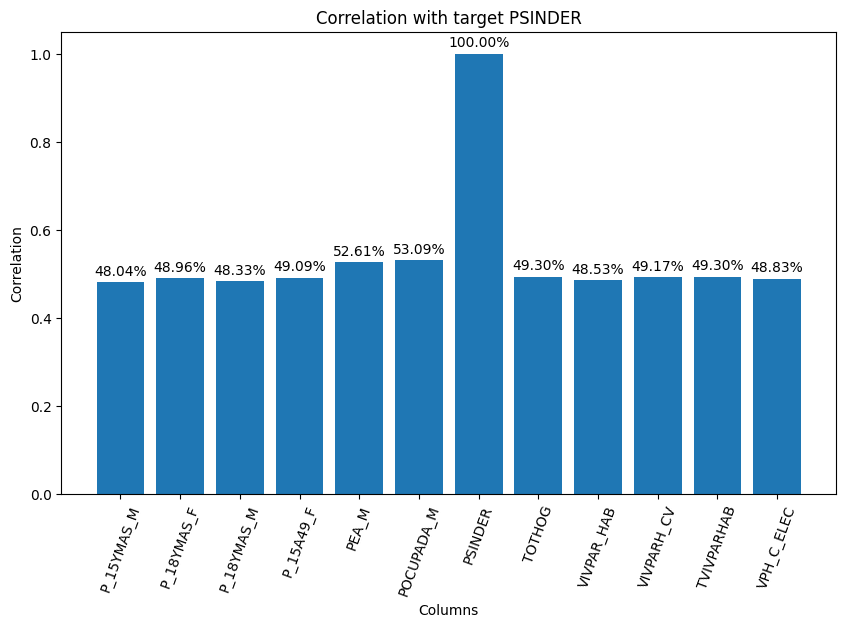

In [25]:
high_per_col = correlation_variable_target[correlation_variable_target >= 0.48].index
plt.figure(figsize=(10, 6))
ax = plt.bar(high_per_col, correlation_variable_target[high_per_col])


for bar in ax:
    height = bar.get_height()
    plt.annotate(f'{height:.2%}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords='offset points',
                 ha='center', va='bottom')

plt.title('Correlation with target PSINDER')
plt.xlabel('Columns')
plt.ylabel('Correlation')
plt.xticks(rotation=70)
plt.show()

In [26]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1678 entries, 0 to 1677
Columns: 276 entries, POBFEM to TAMLOC
dtypes: int16(230), int64(2), int8(44)
memory usage: 852.2 KB


In [27]:
selection_df = df_sub[high_per_col]
selection_df.head()

P_15YMAS_M  P_18YMAS_F  P_18YMAS_M  P_15A49_F  PEA_M  POCUPADA_M  PSINDER  \
0         411         408         398        316    355         341      326   
1         184           7         176        397    168         160        7   
2         201         108         185         45    178         171      102   
3         370         374         354        276    313         301      171   
4         134         152         124         78     89          80        9   

   TOTHOG  VIVPAR_HAB  VIVPARH_CV  TVIVPARHAB  VPH_C_ELEC  
0     333         336         342         333         335  
1     112         114         114         112          56  
2     113         112         115         113          73  
3     303         303         312         303         306  
4      98          88          99          98          94

In [28]:
#Checking for nulls and not numeric values
selection_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1678 entries, 0 to 1677
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   P_15YMAS_M  1678 non-null   int16
 1   P_18YMAS_F  1678 non-null   int16
 2   P_18YMAS_M  1678 non-null   int16
 3   P_15A49_F   1678 non-null   int16
 4   PEA_M       1678 non-null   int16
 5   POCUPADA_M  1678 non-null   int16
 6   PSINDER     1678 non-null   int16
 7   TOTHOG      1678 non-null   int16
 8   VIVPAR_HAB  1678 non-null   int16
 9   VIVPARH_CV  1678 non-null   int16
 10  TVIVPARHAB  1678 non-null   int16
 11  VPH_C_ELEC  1678 non-null   int16
dtypes: int16(12)
memory usage: 39.5 KB


array([[<Axes: xlabel='P_15YMAS_M', ylabel='P_15YMAS_M'>,
        <Axes: xlabel='P_18YMAS_F', ylabel='P_15YMAS_M'>,
        <Axes: xlabel='P_18YMAS_M', ylabel='P_15YMAS_M'>,
        <Axes: xlabel='P_15A49_F', ylabel='P_15YMAS_M'>,
        <Axes: xlabel='PEA_M', ylabel='P_15YMAS_M'>,
        <Axes: xlabel='POCUPADA_M', ylabel='P_15YMAS_M'>,
        <Axes: xlabel='PSINDER', ylabel='P_15YMAS_M'>,
        <Axes: xlabel='TOTHOG', ylabel='P_15YMAS_M'>,
        <Axes: xlabel='VIVPAR_HAB', ylabel='P_15YMAS_M'>,
        <Axes: xlabel='VIVPARH_CV', ylabel='P_15YMAS_M'>,
        <Axes: xlabel='TVIVPARHAB', ylabel='P_15YMAS_M'>,
        <Axes: xlabel='VPH_C_ELEC', ylabel='P_15YMAS_M'>],
       [<Axes: xlabel='P_15YMAS_M', ylabel='P_18YMAS_F'>,
        <Axes: xlabel='P_18YMAS_F', ylabel='P_18YMAS_F'>,
        <Axes: xlabel='P_18YMAS_M', ylabel='P_18YMAS_F'>,
        <Axes: xlabel='P_15A49_F', ylabel='P_18YMAS_F'>,
        <Axes: xlabel='PEA_M', ylabel='P_18YMAS_F'>,
        <Axes: xlabel='POCUPADA_

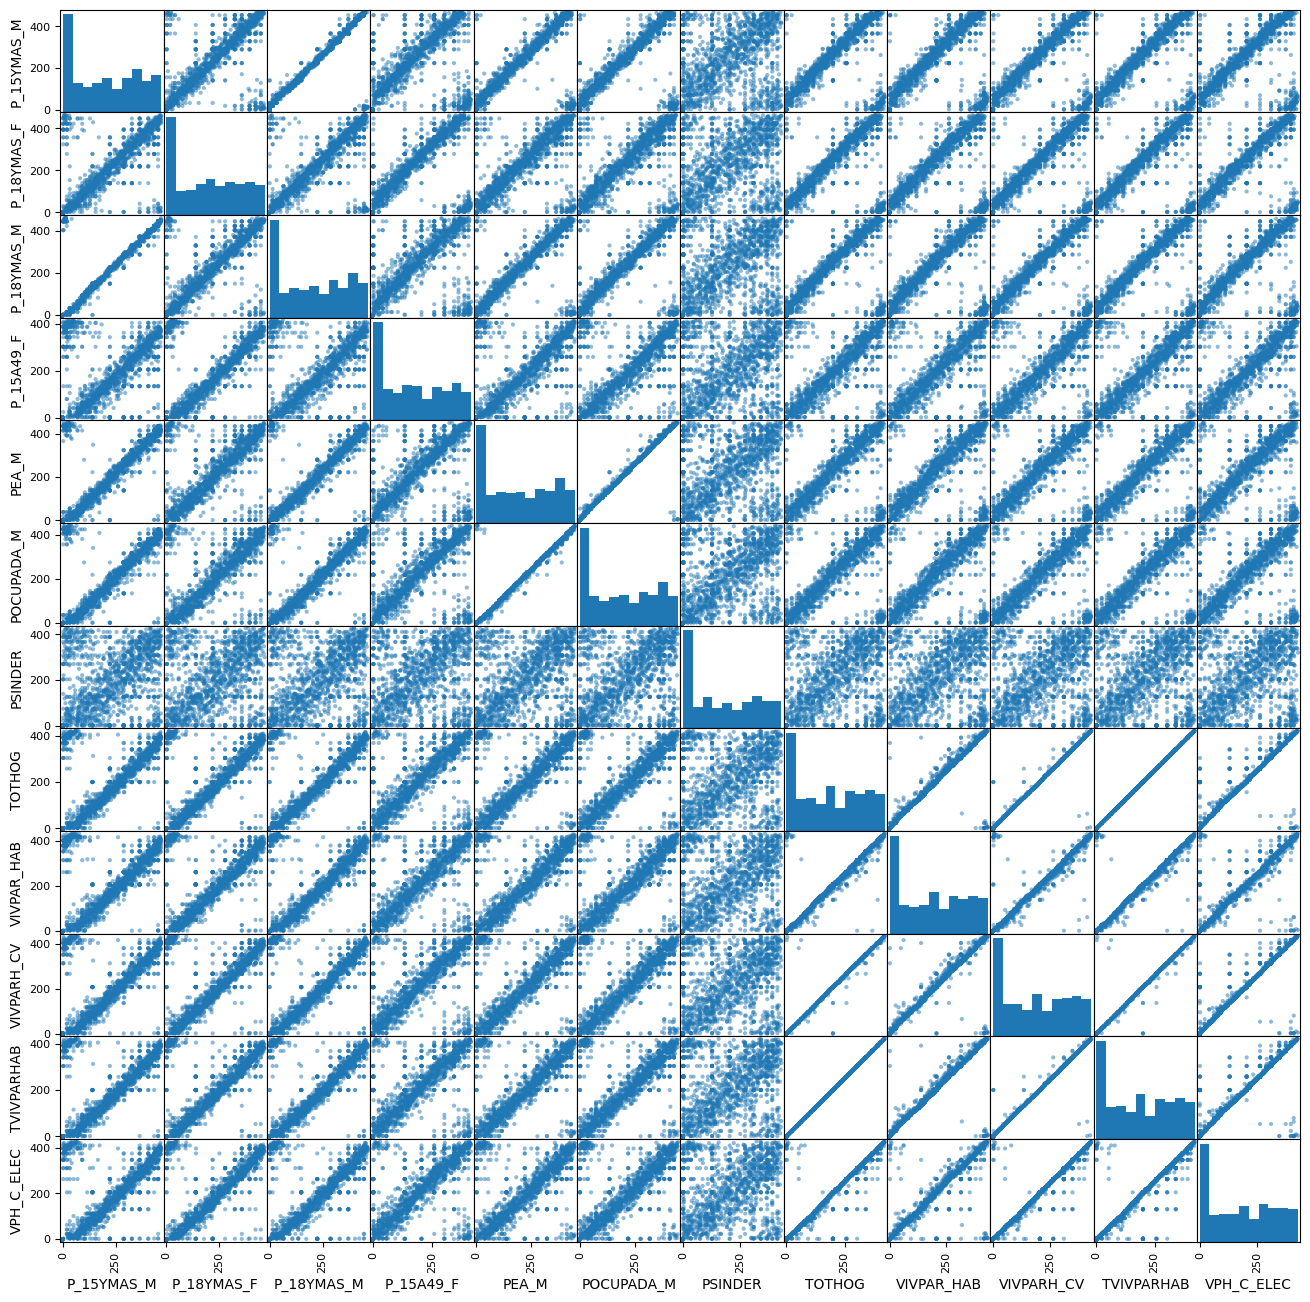

In [29]:
pd.plotting.scatter_matrix(selection_df, figsize=(16,16))

### I see a lot of noise on PSINDER so I will try to fix that 

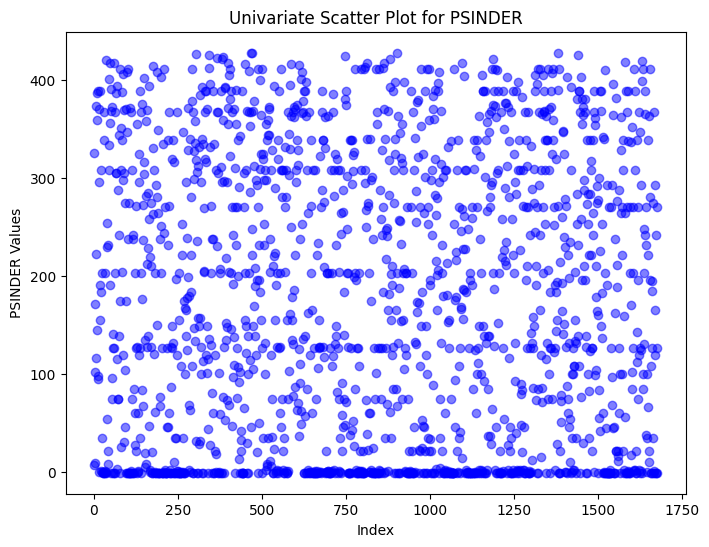

In [30]:
#Checking the problem
plt.figure(figsize=(8, 6))
plt.scatter(range(len(selection_df['PSINDER'])), selection_df['PSINDER'], color='b', alpha=0.5)
plt.title('Univariate Scatter Plot for PSINDER')
plt.xlabel('Index')
plt.ylabel('PSINDER Values')
plt.show()

## To kind of get this noise cleaned I use the moving average technique

/var/folders/7c/4cf3ksfd16nb16xxzztzhsmr0000gn/T/ipykernel_1707/2079992571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selection_df['smoothed_PSINDER'] = selection_df['PSINDER'].rolling(window=window_size, min_periods=1).mean()


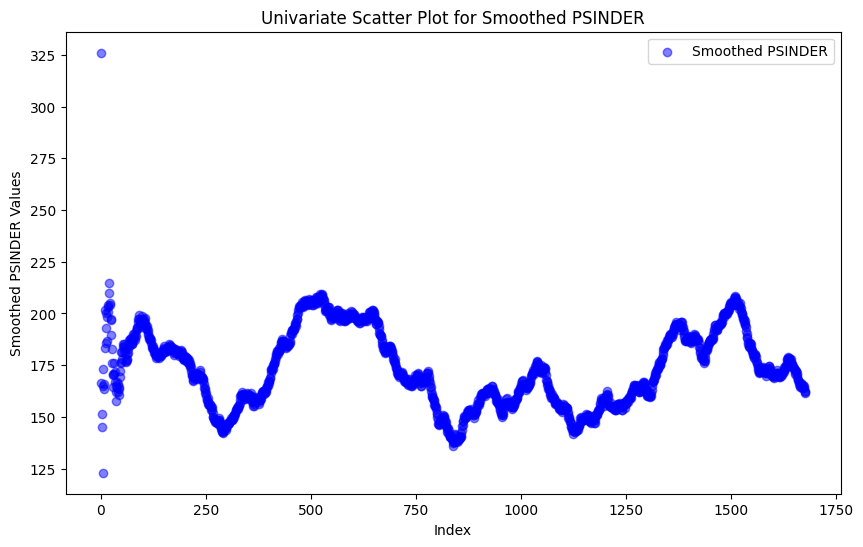

In [31]:
window_size = 200
selection_df['smoothed_PSINDER'] = selection_df['PSINDER'].rolling(window=window_size, min_periods=1).mean()

# Creating a scatter plot of the smoothed data
plt.figure(figsize=(10, 6))
plt.scatter(range(len(selection_df['smoothed_PSINDER'])), selection_df['smoothed_PSINDER'], color='b', alpha=0.5, label='Smoothed PSINDER')
plt.title('Univariate Scatter Plot for Smoothed PSINDER')
plt.xlabel('Index')
plt.ylabel('Smoothed PSINDER Values')
plt.legend()
plt.show()

## Now I try plotting again

array([[<Axes: xlabel='P_15YMAS_M', ylabel='P_15YMAS_M'>,
        <Axes: xlabel='P_18YMAS_F', ylabel='P_15YMAS_M'>,
        <Axes: xlabel='P_18YMAS_M', ylabel='P_15YMAS_M'>,
        <Axes: xlabel='P_15A49_F', ylabel='P_15YMAS_M'>,
        <Axes: xlabel='PEA_M', ylabel='P_15YMAS_M'>,
        <Axes: xlabel='POCUPADA_M', ylabel='P_15YMAS_M'>,
        <Axes: xlabel='PSINDER', ylabel='P_15YMAS_M'>,
        <Axes: xlabel='TOTHOG', ylabel='P_15YMAS_M'>,
        <Axes: xlabel='VIVPAR_HAB', ylabel='P_15YMAS_M'>,
        <Axes: xlabel='VIVPARH_CV', ylabel='P_15YMAS_M'>,
        <Axes: xlabel='TVIVPARHAB', ylabel='P_15YMAS_M'>,
        <Axes: xlabel='VPH_C_ELEC', ylabel='P_15YMAS_M'>,
        <Axes: xlabel='smoothed_PSINDER', ylabel='P_15YMAS_M'>],
       [<Axes: xlabel='P_15YMAS_M', ylabel='P_18YMAS_F'>,
        <Axes: xlabel='P_18YMAS_F', ylabel='P_18YMAS_F'>,
        <Axes: xlabel='P_18YMAS_M', ylabel='P_18YMAS_F'>,
        <Axes: xlabel='P_15A49_F', ylabel='P_18YMAS_F'>,
        <Axes: xlabel

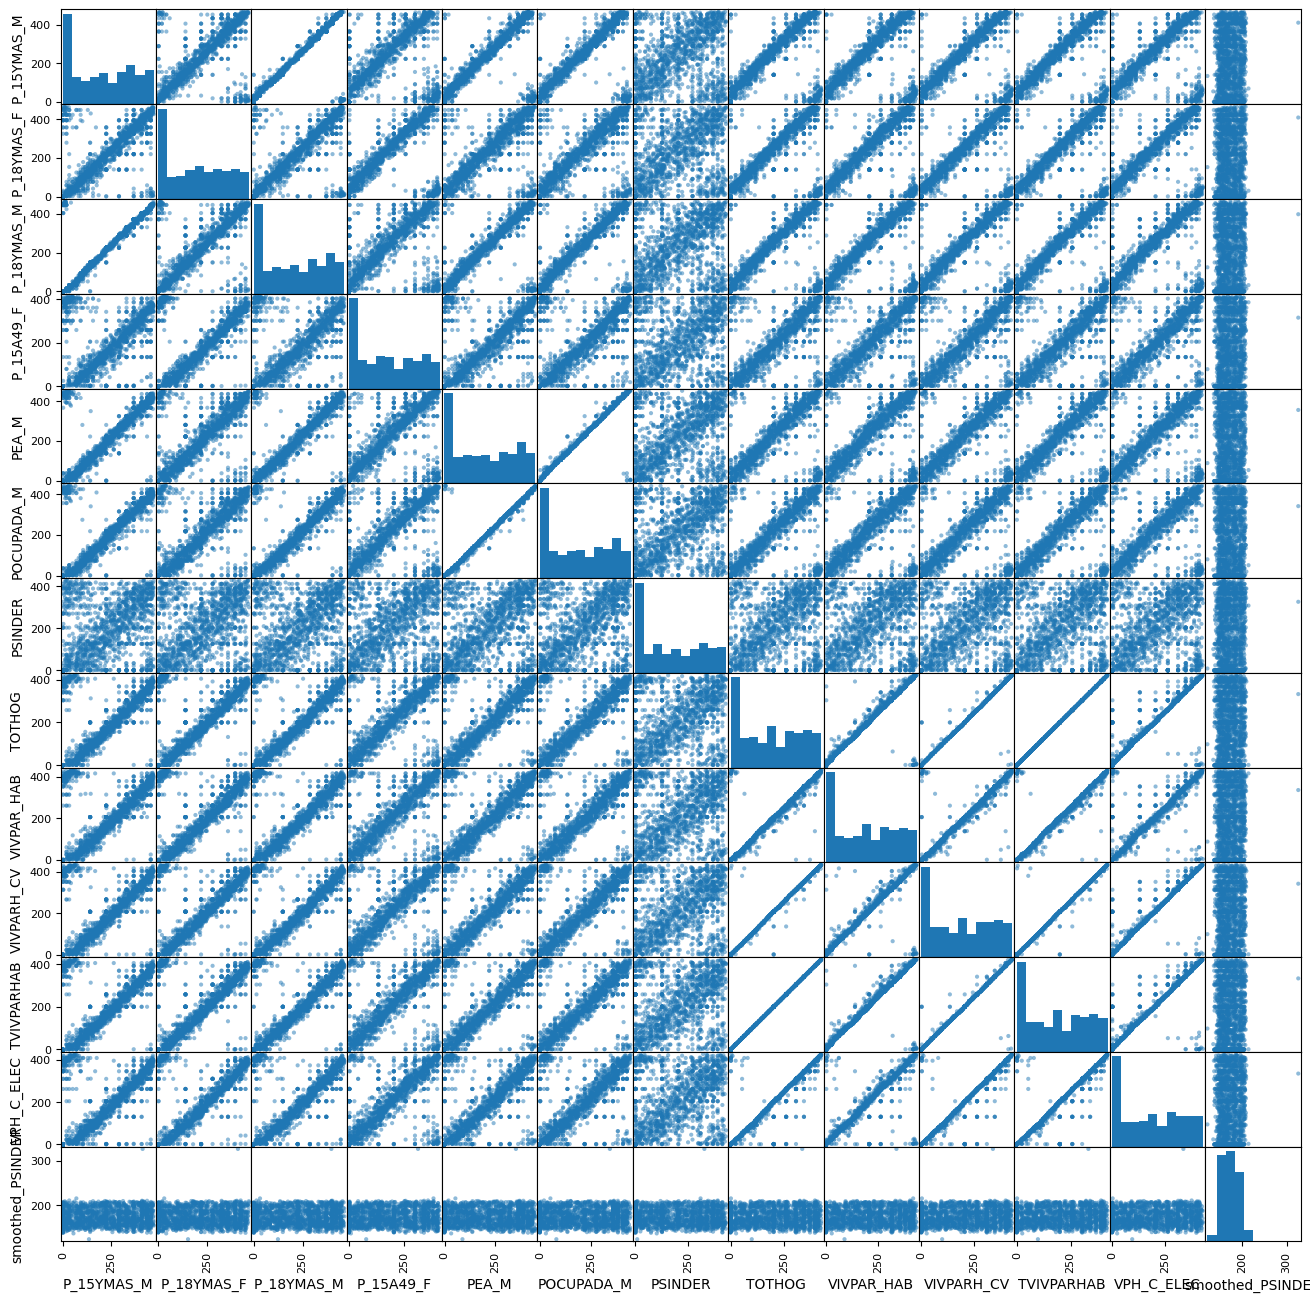

In [32]:
pd.plotting.scatter_matrix(selection_df, figsize=(16,16))

### It did not worked so I will try another technique: Median Filter

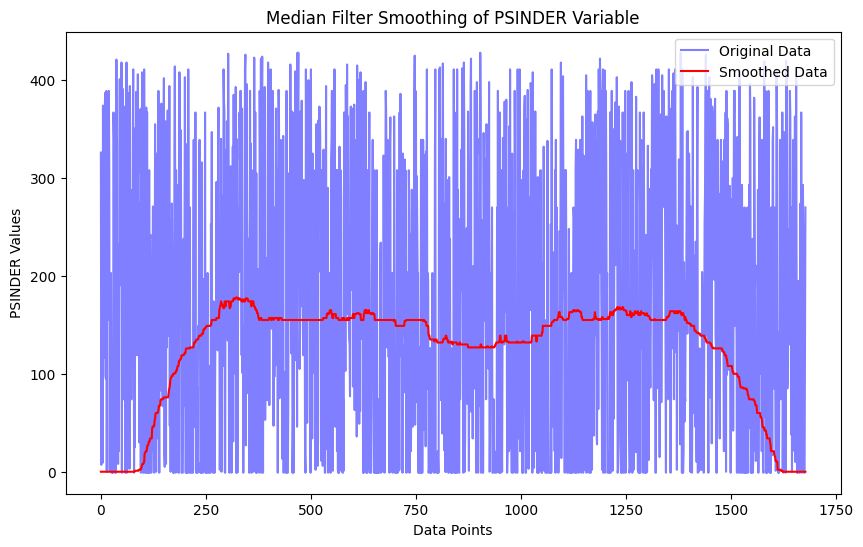

In [33]:

from scipy.signal import medfilt

# Assuming psinder_values is the array containing the 'PSINDER' variable values

# Set the window size for the median filter
window_size = 573  # Adjust the window size as needed

# Apply the median filter
psinder_smoothed = medfilt(selection_df["PSINDER"], kernel_size=window_size)

# Plot the original and smoothed data
plt.figure(figsize=(10, 6))
plt.plot(selection_df["PSINDER"], color='blue', label='Original Data', alpha=0.5)
plt.plot(psinder_smoothed, color='red', label='Smoothed Data')
plt.xlabel('Data Points')
plt.ylabel('PSINDER Values')
plt.title('Median Filter Smoothing of PSINDER Variable')
plt.legend()
plt.show()

### Since It did not really worked I am working with the original Selection_df

In [34]:
selection_df.head()

P_15YMAS_M  P_18YMAS_F  P_18YMAS_M  P_15A49_F  PEA_M  POCUPADA_M  PSINDER  \
0         411         408         398        316    355         341      326   
1         184           7         176        397    168         160        7   
2         201         108         185         45    178         171      102   
3         370         374         354        276    313         301      171   
4         134         152         124         78     89          80        9   

   TOTHOG  VIVPAR_HAB  VIVPARH_CV  TVIVPARHAB  VPH_C_ELEC  smoothed_PSINDER  
0     333         336         342         333         335             326.0  
1     112         114         114         112          56             166.5  
2     113         112         115         113          73             145.0  
3     303         303         312         303         306             151.5  
4      98          88          99          98          94             123.0

In [35]:
selection_df =selection_df.drop(columns="smoothed_PSINDER")

array([[<Axes: xlabel='P_15YMAS_M', ylabel='P_15YMAS_M'>,
        <Axes: xlabel='P_18YMAS_F', ylabel='P_15YMAS_M'>,
        <Axes: xlabel='P_18YMAS_M', ylabel='P_15YMAS_M'>,
        <Axes: xlabel='P_15A49_F', ylabel='P_15YMAS_M'>,
        <Axes: xlabel='PEA_M', ylabel='P_15YMAS_M'>,
        <Axes: xlabel='POCUPADA_M', ylabel='P_15YMAS_M'>,
        <Axes: xlabel='PSINDER', ylabel='P_15YMAS_M'>,
        <Axes: xlabel='TOTHOG', ylabel='P_15YMAS_M'>,
        <Axes: xlabel='VIVPAR_HAB', ylabel='P_15YMAS_M'>,
        <Axes: xlabel='VIVPARH_CV', ylabel='P_15YMAS_M'>,
        <Axes: xlabel='TVIVPARHAB', ylabel='P_15YMAS_M'>,
        <Axes: xlabel='VPH_C_ELEC', ylabel='P_15YMAS_M'>],
       [<Axes: xlabel='P_15YMAS_M', ylabel='P_18YMAS_F'>,
        <Axes: xlabel='P_18YMAS_F', ylabel='P_18YMAS_F'>,
        <Axes: xlabel='P_18YMAS_M', ylabel='P_18YMAS_F'>,
        <Axes: xlabel='P_15A49_F', ylabel='P_18YMAS_F'>,
        <Axes: xlabel='PEA_M', ylabel='P_18YMAS_F'>,
        <Axes: xlabel='POCUPADA_

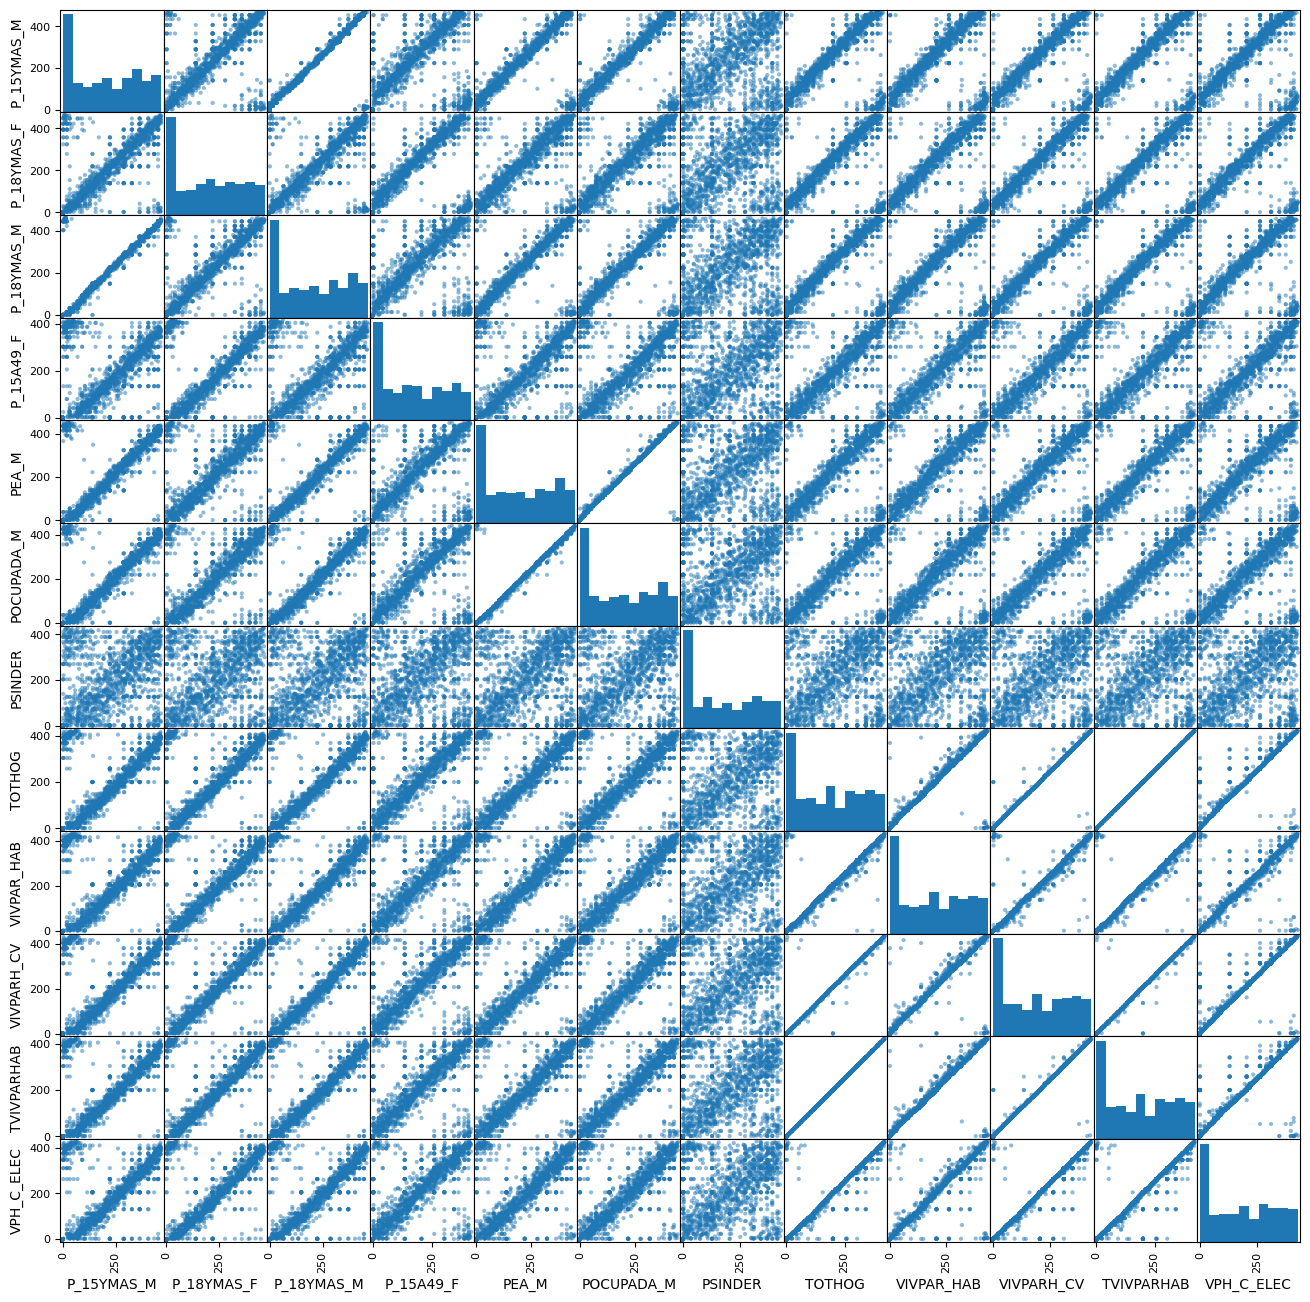

In [36]:
pd.plotting.scatter_matrix(selection_df, figsize=(16,16))

## I am going to standarize the selection_df data with Standard Scaler

In [37]:
from sklearn.preprocessing import StandardScaler

# Assuming selection_df is your DataFrame
# Extract the numerical columns from selection_df if needed

# Standardize the data
scaler = StandardScaler()
selection_df_standardized = scaler.fit_transform(selection_df)

# Create a new DataFrame with the standardized data
selection_df_standardized = pd.DataFrame(selection_df_standardized, columns=selection_df.columns)

# Display the first few rows of the standardized DataFrame
selection_df_standardized.head()


P_15YMAS_M  P_18YMAS_F  P_18YMAS_M  P_15A49_F     PEA_M  POCUPADA_M  \
0    1.341771    1.408195    1.277153   1.072167  1.080453    1.060744   
1   -0.118249   -1.244755   -0.163056   1.669284 -0.170505   -0.183442   
2   -0.008908   -0.576555   -0.104669  -0.925592 -0.103609   -0.107829   
3    1.078067    1.183257    0.991706   0.777295  0.799489    0.785786   
4   -0.439839   -0.285459   -0.500402  -0.682323 -0.698985   -0.733359   

    PSINDER    TOTHOG  VIVPAR_HAB  VIVPARH_CV  TVIVPARHAB  VPH_C_ELEC  
0  1.073732  1.095692    1.061261    1.087897    1.095692    1.110368  
1 -1.147548 -0.512398   -0.515570   -0.519620   -0.512398   -0.888226  
2 -0.486038 -0.505122   -0.529776   -0.512570   -0.505122   -0.766447  
3 -0.005573  0.877399    0.826867    0.876381    0.877399    0.902629  
4 -1.133621 -0.614268   -0.700244   -0.625378   -0.614268   -0.616016

### Z-score for creating the linear Regression

In [38]:
from scipy import stats

# Compute the Z-scores for each data point
selection_df_zscores = pd.DataFrame(stats.zscore(selection_df_standardized), columns=selection_df_standardized.columns)

# Display the first few rows of the DataFrame with Z-scores
selection_df_zscores.head()


P_15YMAS_M  P_18YMAS_F  P_18YMAS_M  P_15A49_F     PEA_M  POCUPADA_M  \
0    1.341771    1.408195    1.277153   1.072167  1.080453    1.060744   
1   -0.118249   -1.244755   -0.163056   1.669284 -0.170505   -0.183442   
2   -0.008908   -0.576555   -0.104669  -0.925592 -0.103609   -0.107829   
3    1.078067    1.183257    0.991706   0.777295  0.799489    0.785786   
4   -0.439839   -0.285459   -0.500402  -0.682323 -0.698985   -0.733359   

    PSINDER    TOTHOG  VIVPAR_HAB  VIVPARH_CV  TVIVPARHAB  VPH_C_ELEC  
0  1.073732  1.095692    1.061261    1.087897    1.095692    1.110368  
1 -1.147548 -0.512398   -0.515570   -0.519620   -0.512398   -0.888226  
2 -0.486038 -0.505122   -0.529776   -0.512570   -0.505122   -0.766447  
3 -0.005573  0.877399    0.826867    0.876381    0.877399    0.902629  
4 -1.133621 -0.614268   -0.700244   -0.625378   -0.614268   -0.616016

#### Percentage of z-score

In [39]:
from scipy.stats import norm

# Set the range for the Z-scores
lower_bound = -1  # Define the lower bound of the Z-score range
upper_bound = 1  # Define the upper bound of the Z-score range

# Calculate the percentage of data points within the specified range
percentage_within_range = (norm.cdf(upper_bound) - norm.cdf(lower_bound)) * 100

# Print the percentage
print(f"The percentage of data points within the range of {lower_bound} to {upper_bound} Z-scores is: {percentage_within_range:.2f}%")

The percentage of data points within the range of -1 to 1 Z-scores is: 68.27%


## Now I create my linear Regression Model with the selection_df but standarized and also using my z-score df 

##### Getting mean squared error and r2 score for starters and then training the model with my target variable

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


target = selection_df_standardized['PSINDER']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selection_df_zscores, target, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error and the coefficient of determination (R-squared)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Squared Error: 0.00
R-squared: 1.00


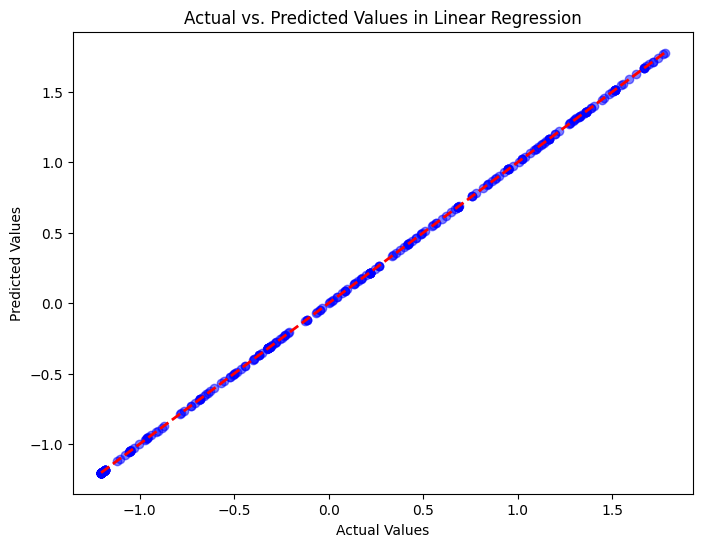

In [42]:
# Plot the actual target values vs. the predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2)
plt.title('Actual vs. Predicted Values in Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

### Conclusion 
There were some errors and downfalls because, apparently, my variable had a lot of correlation with every other variable, It became, at some point, difficult to manage with that variable, I tried with others and it wasnt as difficult as with this one. 
Finally, I utilized some methods for cleaning, I did a Dimensionality reduction with the PCA technique and tried to clean the noise from my variable with median filter and moving average. It did not go as planned but I learned that it is part of the work. I decided to do it with my original selected dataset after the PCA. And, it seems that it worked out. 

### Important points
I used the Standard Scaler, although there were other techniques, its the one I chose for simplicity. 
I used PCA technique since it seemed to worked correctly on my dataset. 
The noise cleaning techniques I used seem to do something but did not go as intended. Probably was because of a variable variance or some disyunctions. 